In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import dbscan
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:2f}'.format

In [2]:
df=pd.read_csv(r"C:\Users\kumar\Downloads\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.200000,10.000000,7.580000,44.900000,1610,9.440000,56.200000,5.820000,553
1,Albania,16.600000,28.000000,6.550000,48.600000,9930,4.490000,76.300000,1.650000,4090
2,Algeria,27.300000,38.400000,4.170000,31.400000,12900,16.100000,76.500000,2.890000,4460
3,Angola,119.000000,62.300000,2.850000,42.900000,5900,22.400000,60.100000,6.160000,3530
4,Antigua and Barbuda,10.300000,45.500000,6.030000,58.900000,19100,1.440000,76.800000,2.130000,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

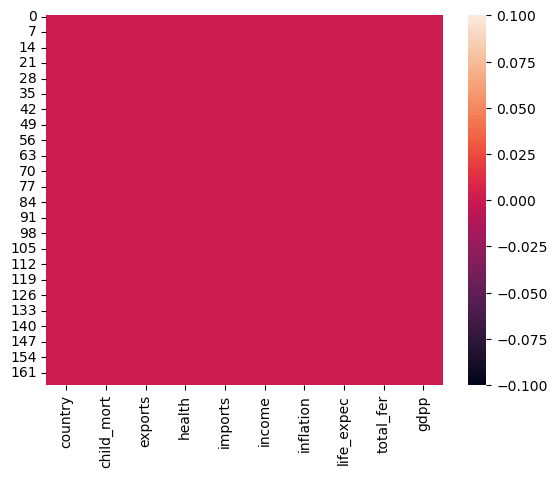

In [5]:
sns.heatmap(df.isnull())

<Axes: >

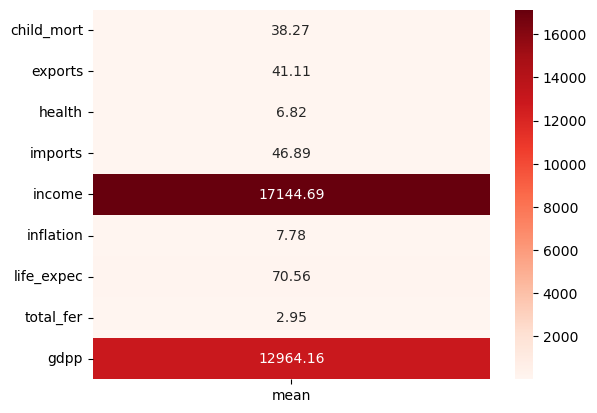

In [6]:
sns.heatmap(df.describe().T[['mean']],cmap='Reds',annot=True,fmt='.2f')

In [7]:
cols=list(df.columns)
cols.remove('country')
categorical_variable=['country']
numerical_variable=[*cols]
print("categorical variables:",categorical_variable)
print("numerical variables:",numerical_variable)

categorical variables: ['country']
numerical variables: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


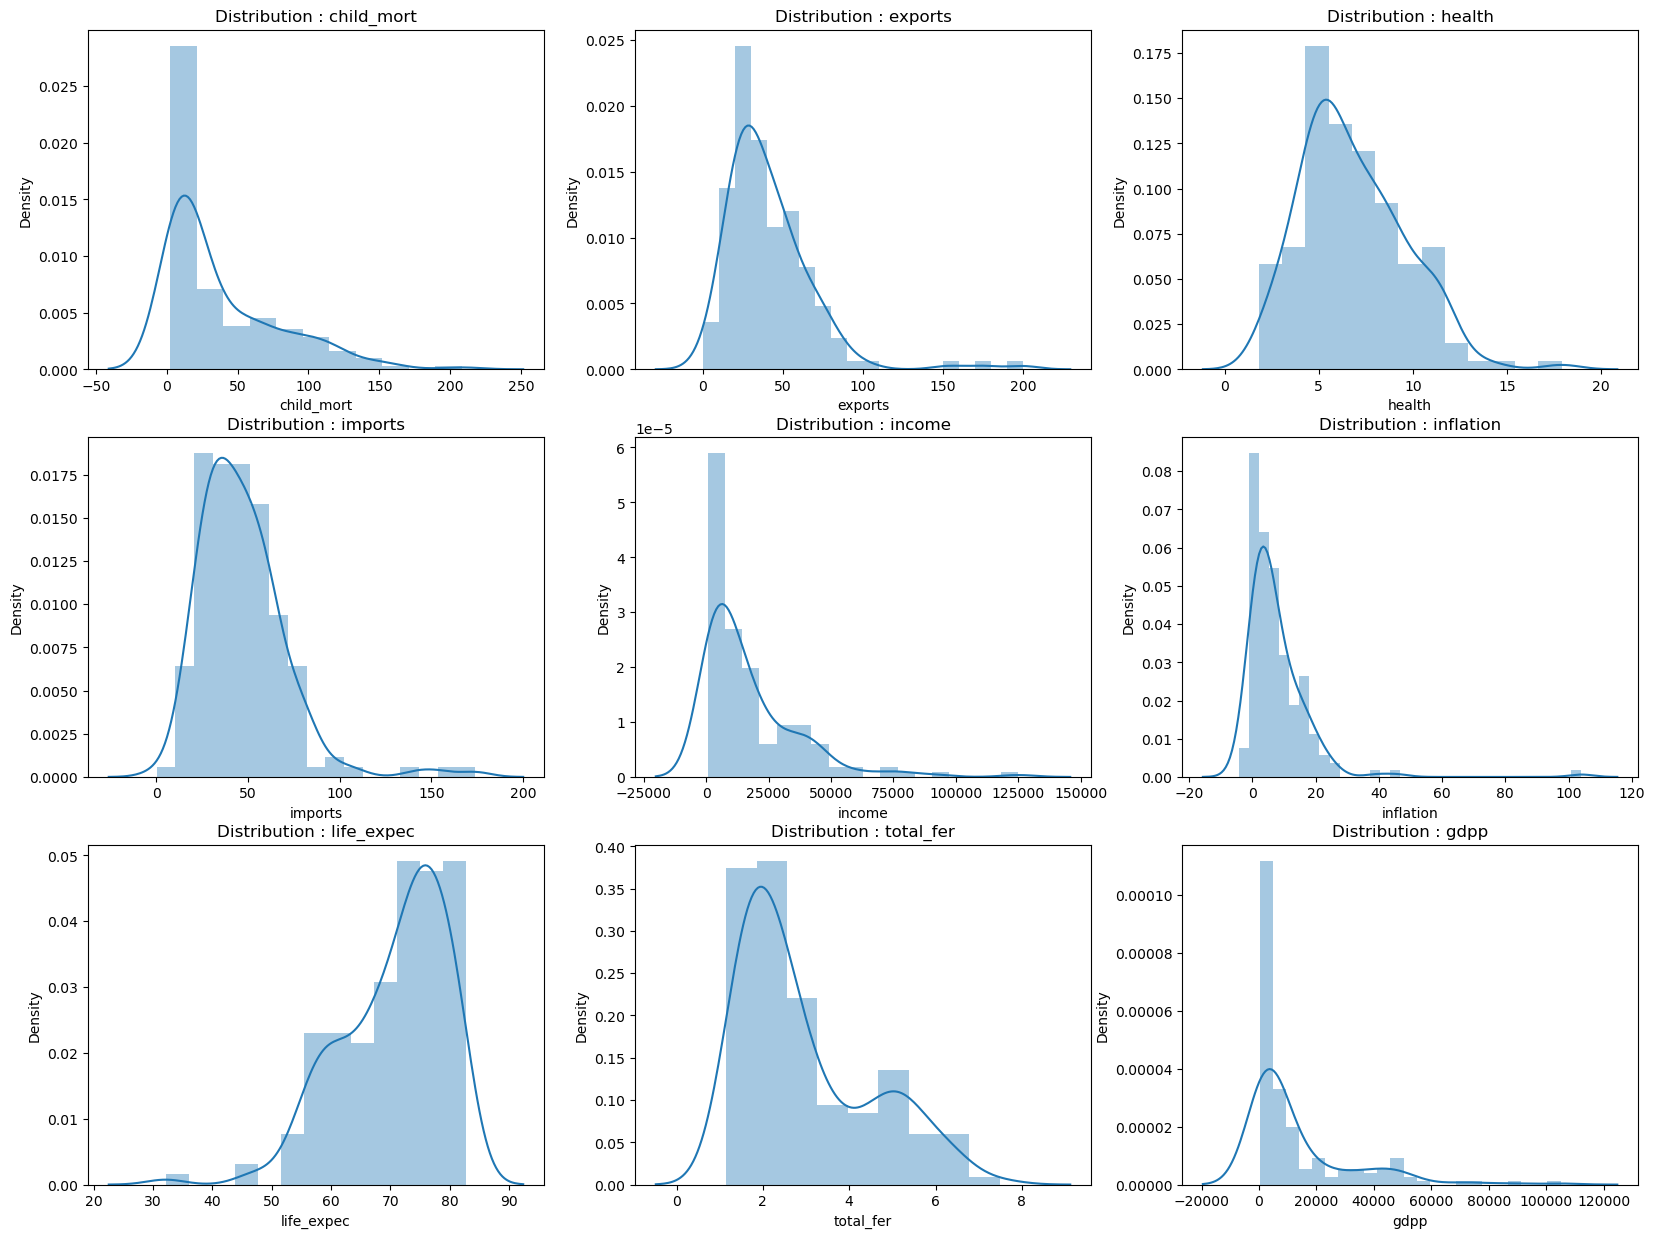

In [8]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
for i in range(len(numerical_variable)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_variable[i]])
    title = 'Distribution : ' + numerical_variable[i]
    plt.title(title)
plt.show()

In [9]:
len(df['country'].unique())==len(df)

True

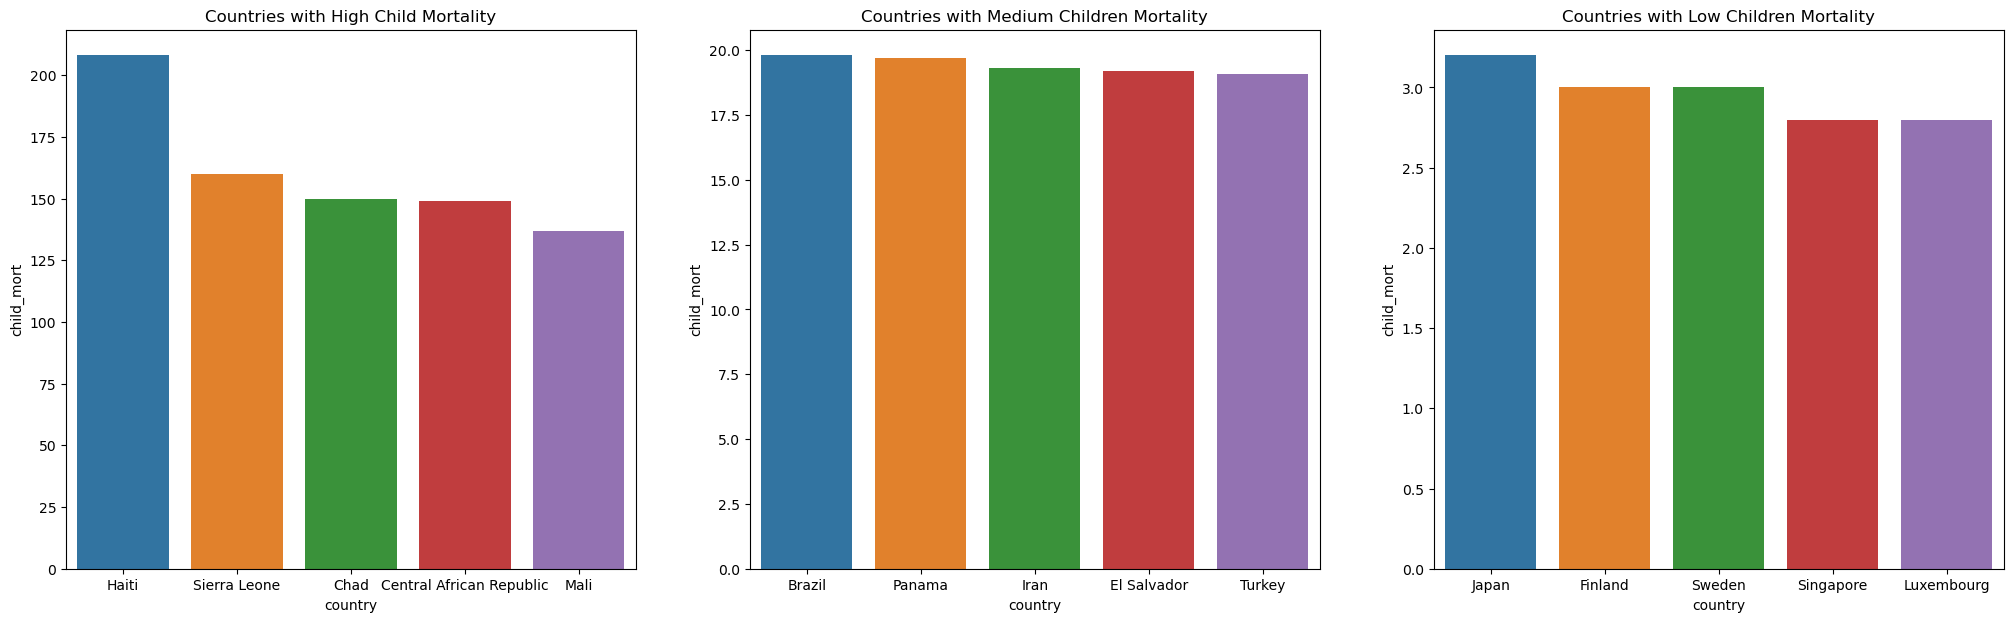

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='child_mort', data=df.sort_values(by='child_mort', ascending=False).iloc[:5])
plt.title("Countries with High Child Mortality")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='child_mort', data=df.sort_values(by='child_mort', ascending=False).iloc[81:86])
plt.title('Countries with Medium Children Mortality')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='child_mort', data=df.sort_values(by='child_mort', ascending=False).iloc[161:166])
plt.title('Countries with Low Children Mortality')
plt.show()

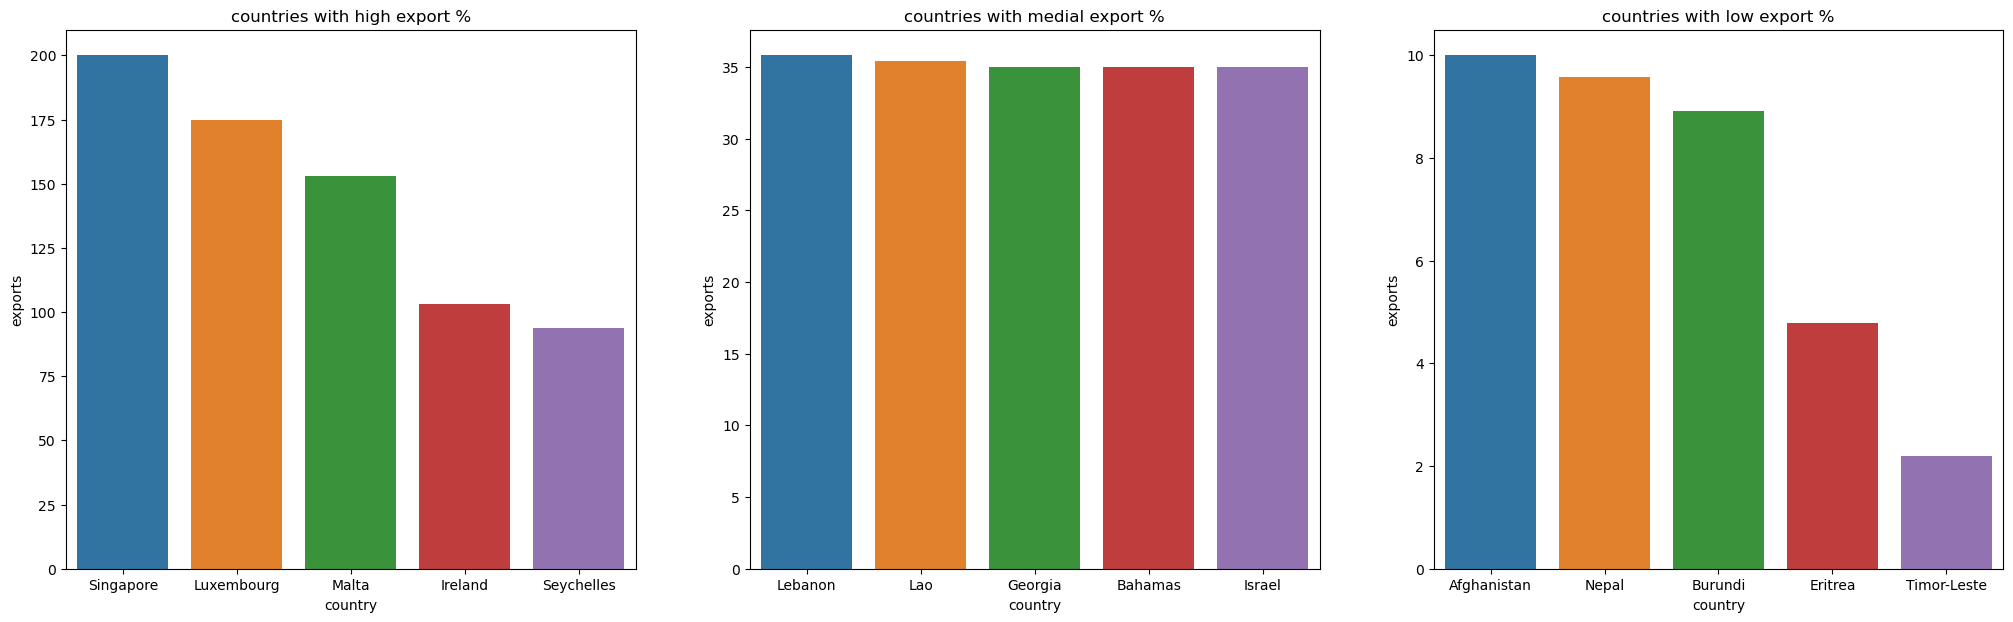

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,7))
plt.subplot(1,3,1)
sns.barplot(x='country',y='exports',data=df.sort_values(by='exports',ascending=False).iloc[:5])
plt.title('countries with high export %')
plt.subplot(1,3,2)
sns.barplot(x='country',y='exports',data=df.sort_values(by='exports',ascending=False).iloc[81:86])
plt.title("countries with medial export %")
plt.subplot(1,3,3)
sns.barplot(x='country',y='exports',data=df.sort_values(by='exports',ascending=False).iloc[161:166])
plt.title("countries with low export %")
plt.show()

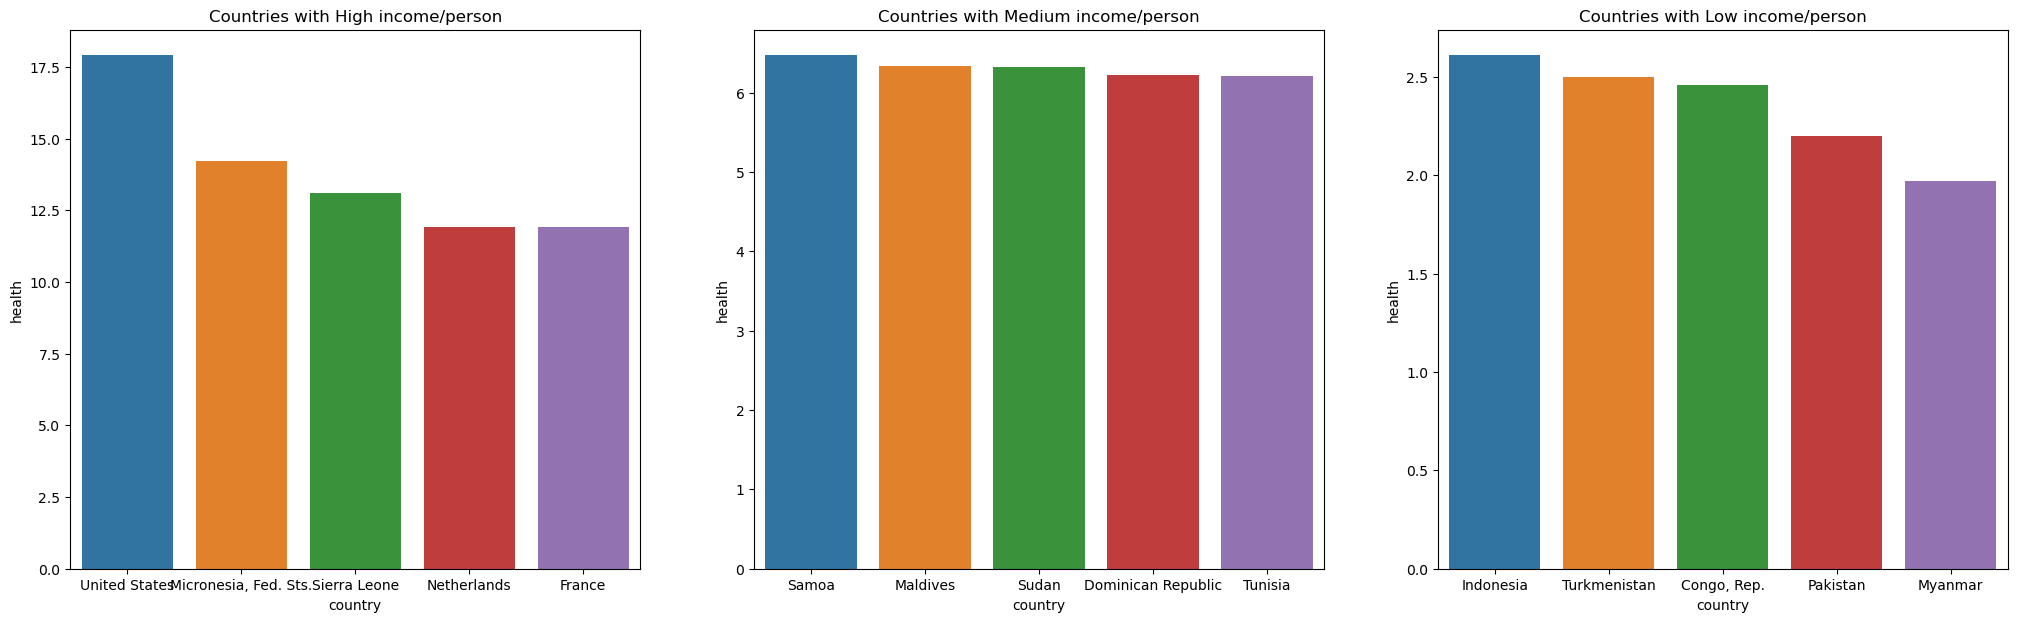

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='health', data=df.sort_values(by='health', ascending=False).iloc[:5])
plt.title("Countries with High income/person")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='health', data=df.sort_values(by='health', ascending=False).iloc[81:86])
plt.title('Countries with Medium income/person')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='health', data=df.sort_values(by='health', ascending=False).iloc[161:166])
plt.title('Countries with Low income/person')
plt.show()

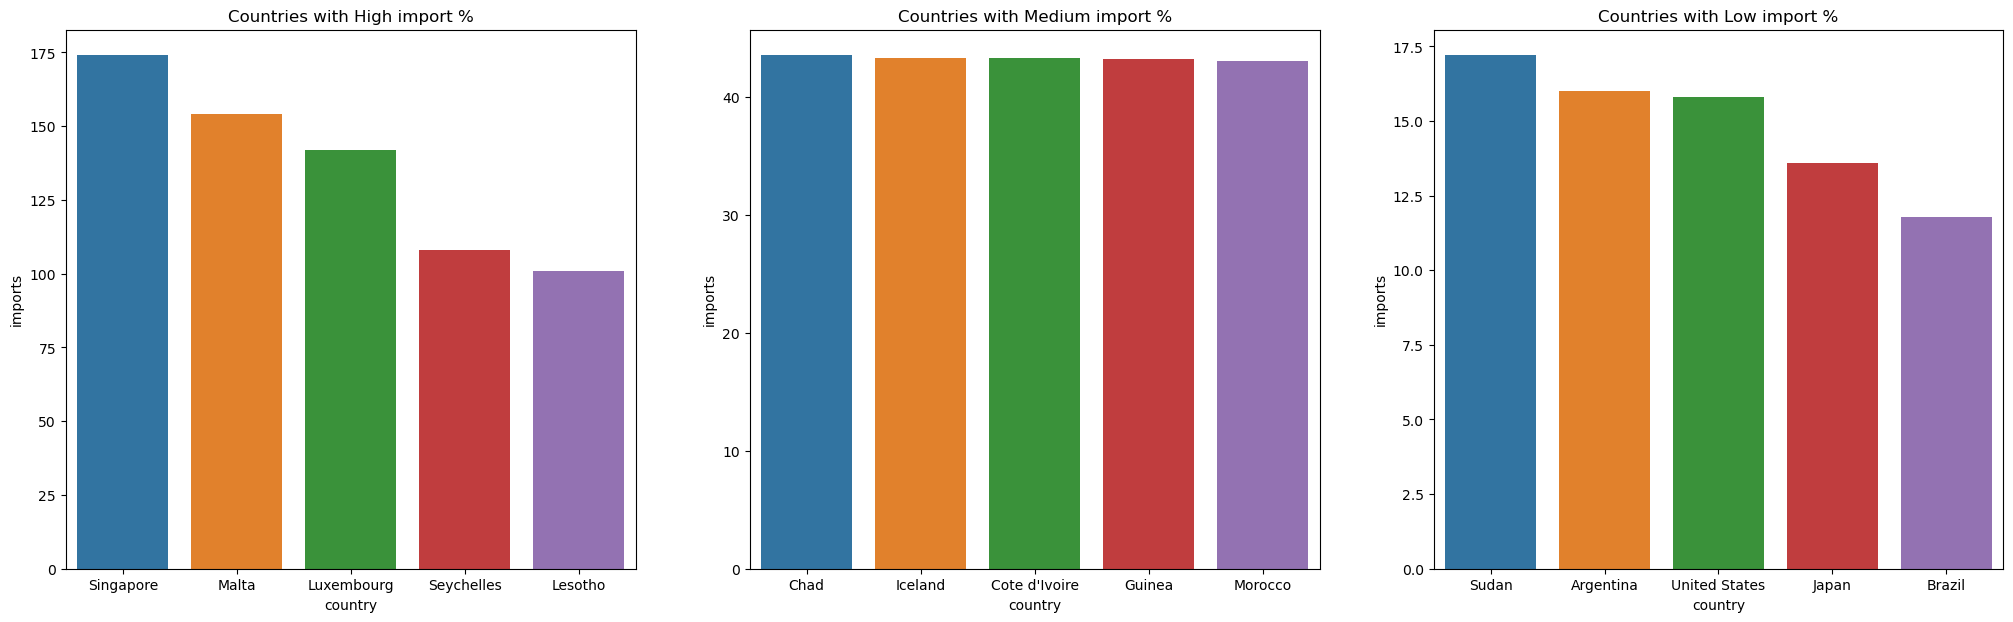

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='imports', data=df.sort_values(by='imports', ascending=False).iloc[:5])
plt.title("Countries with High import %")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='imports', data=df.sort_values(by='imports', ascending=False).iloc[81:86])
plt.title('Countries with Medium import %')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='imports', data=df.sort_values(by='imports', ascending=False).iloc[161:166])
plt.title('Countries with Low import %')
plt.show()

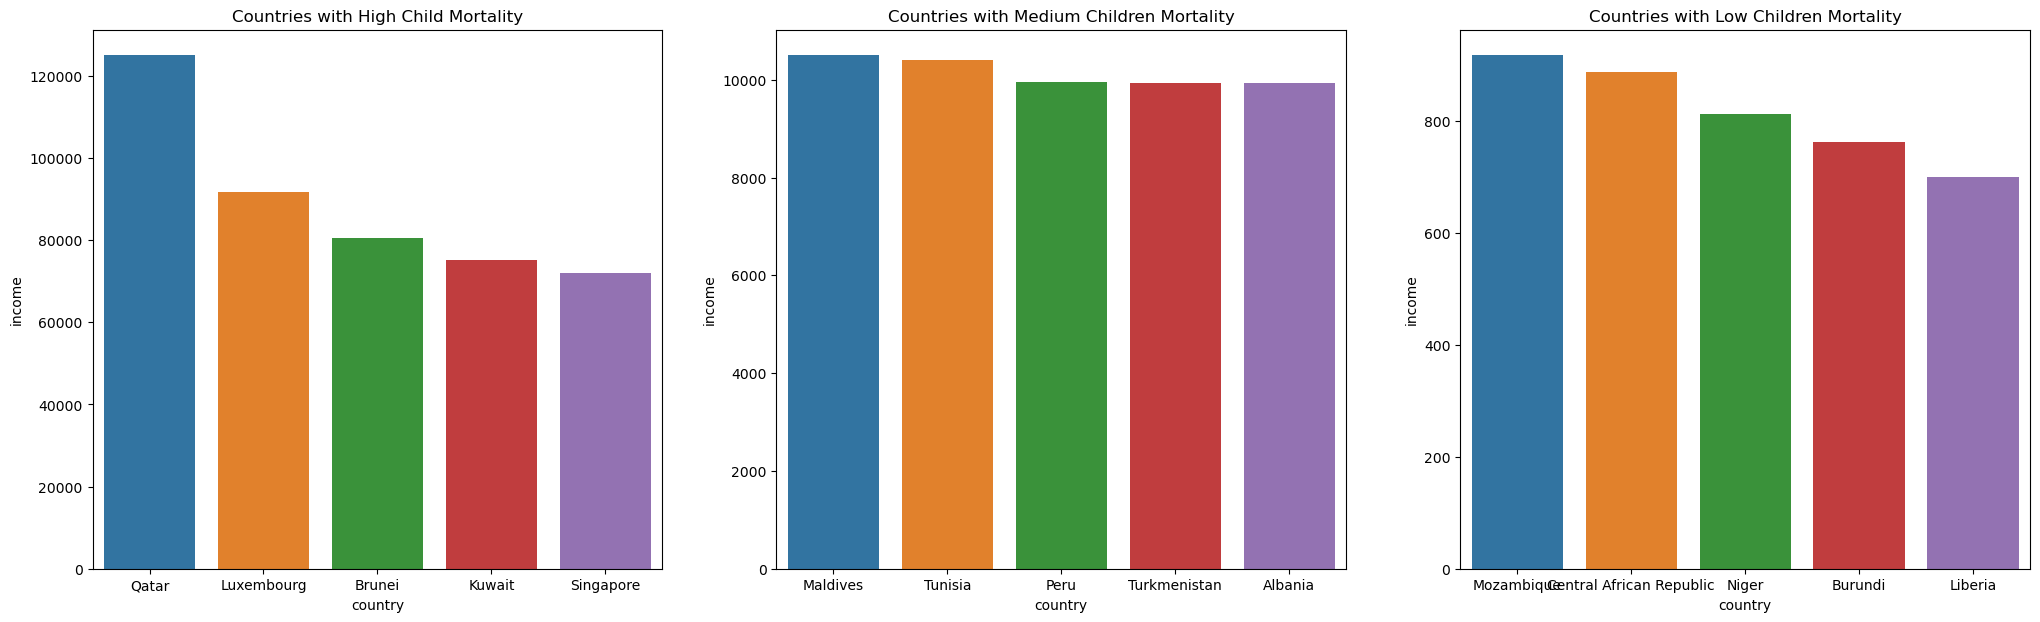

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='income', data=df.sort_values(by='income', ascending=False).iloc[:5])
plt.title("Countries with High Child Mortality")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='income', data=df.sort_values(by='income', ascending=False).iloc[81:86])
plt.title('Countries with Medium Children Mortality')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='income', data=df.sort_values(by='income', ascending=False).iloc[161:166])
plt.title('Countries with Low Children Mortality')
plt.show()

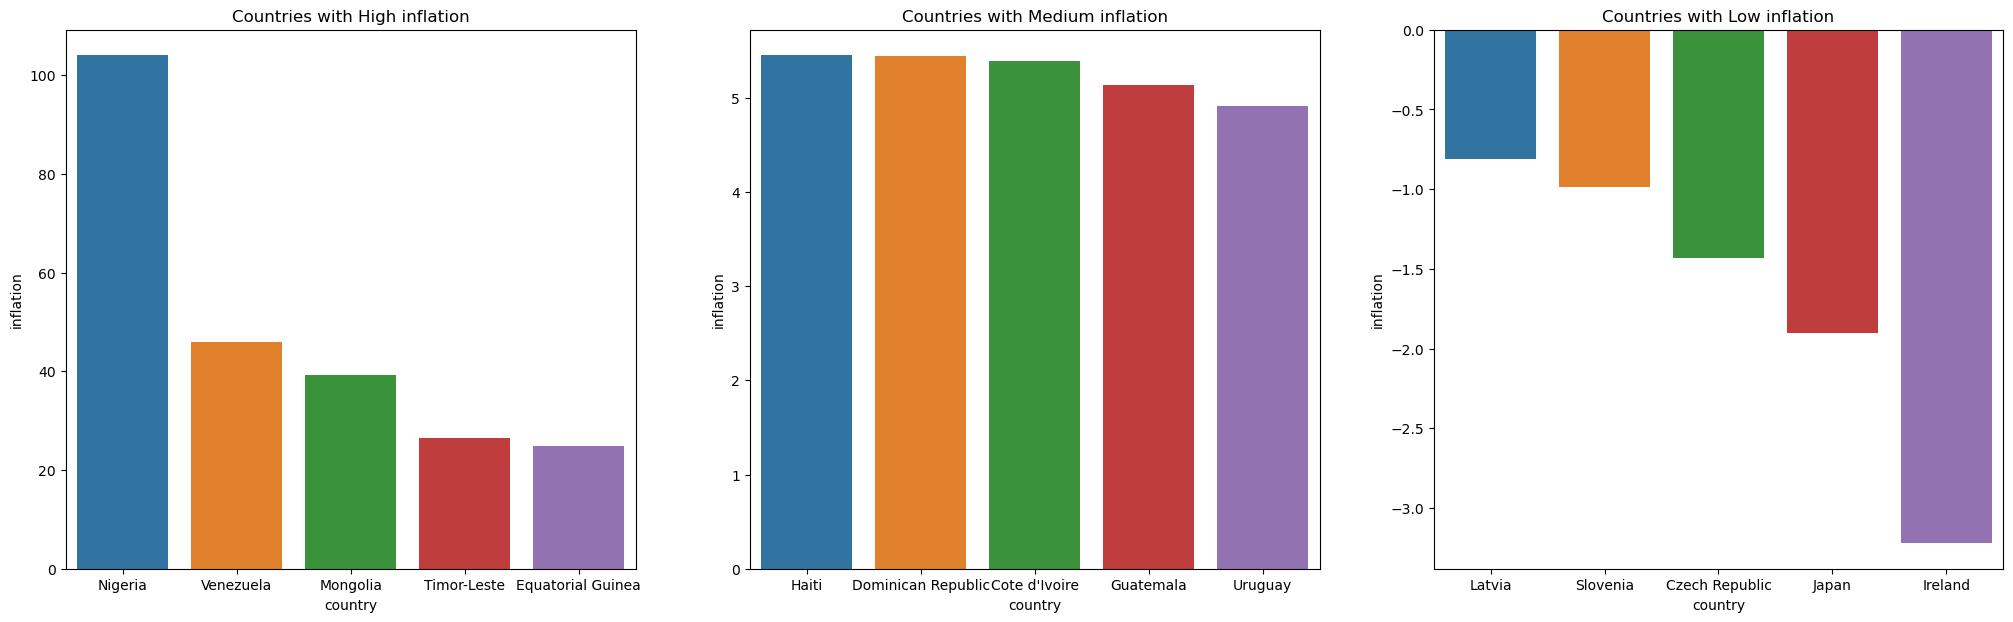

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='inflation', data=df.sort_values(by='inflation', ascending=False).iloc[:5])
plt.title("Countries with High inflation")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='inflation', data=df.sort_values(by='inflation', ascending=False).iloc[81:86])
plt.title('Countries with Medium inflation')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='inflation', data=df.sort_values(by='inflation', ascending=False).iloc[161:166])
plt.title('Countries with Low inflation')
plt.show()

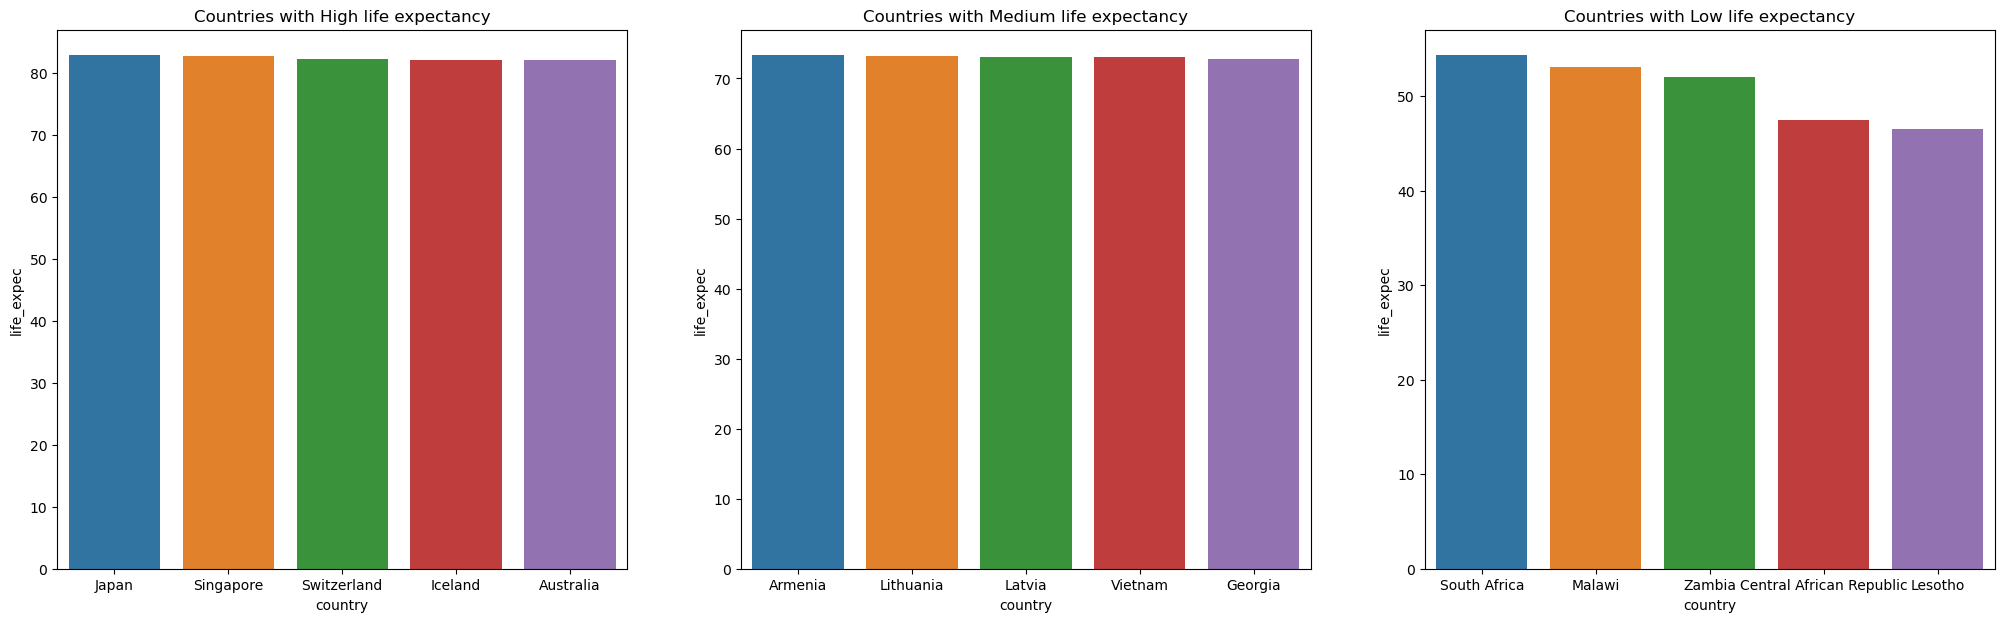

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='life_expec', data=df.sort_values(by='life_expec', ascending=False).iloc[:5])
plt.title("Countries with High life expectancy")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='life_expec', data=df.sort_values(by='life_expec', ascending=False).iloc[81:86])
plt.title('Countries with Medium life expectancy')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='life_expec', data=df.sort_values(by='life_expec', ascending=False).iloc[161:166])
plt.title('Countries with Low life expectancy')
plt.show()

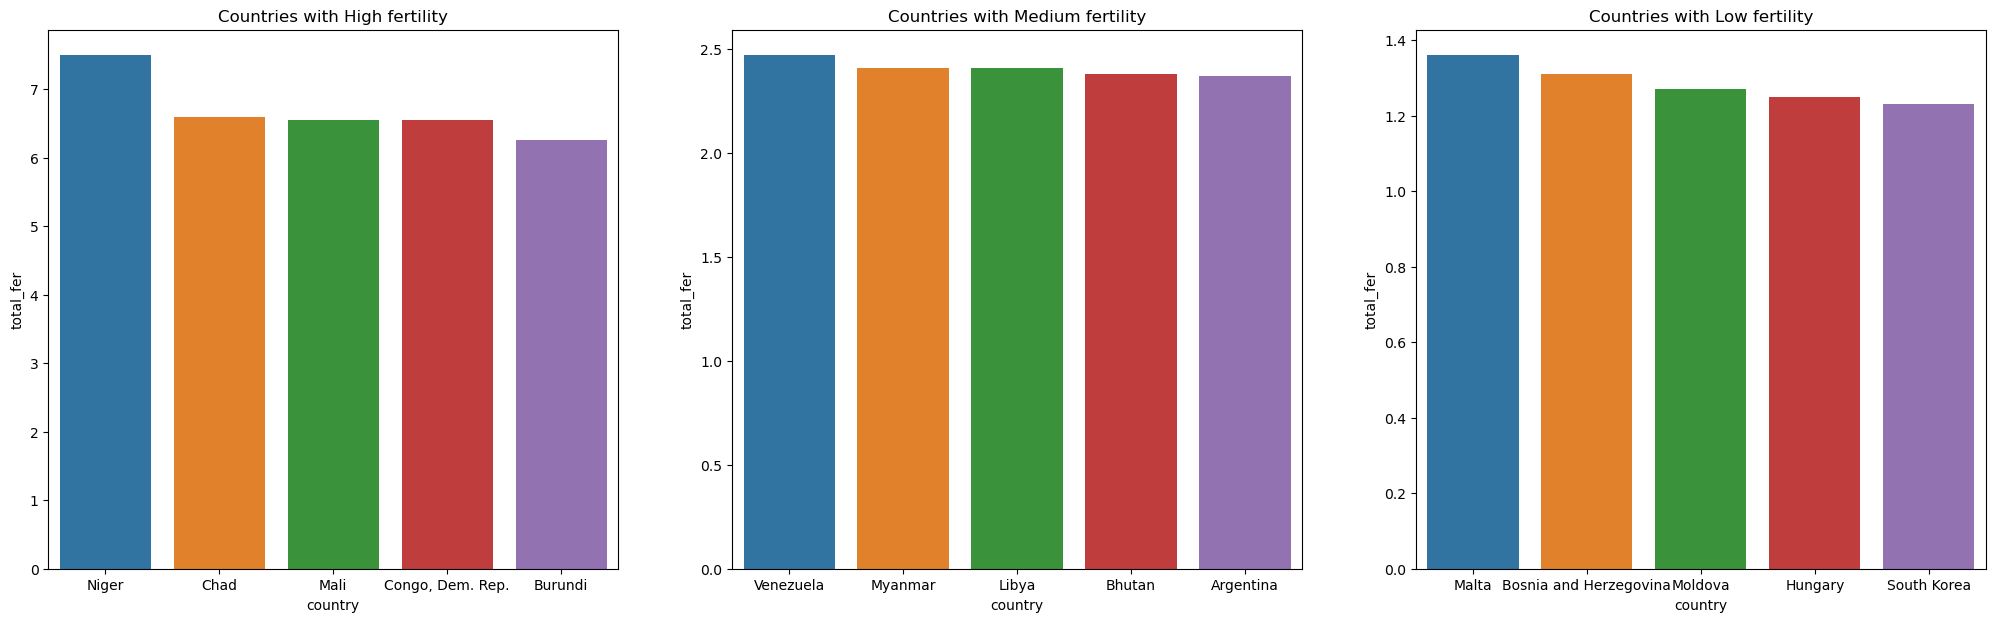

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='total_fer', data=df.sort_values(by='total_fer', ascending=False).iloc[:5])
plt.title("Countries with High fertility")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='total_fer', data=df.sort_values(by='total_fer', ascending=False).iloc[81:86])
plt.title('Countries with Medium fertility')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='total_fer', data=df.sort_values(by='total_fer', ascending=False).iloc[161:166])
plt.title('Countries with Low fertility')
plt.show()

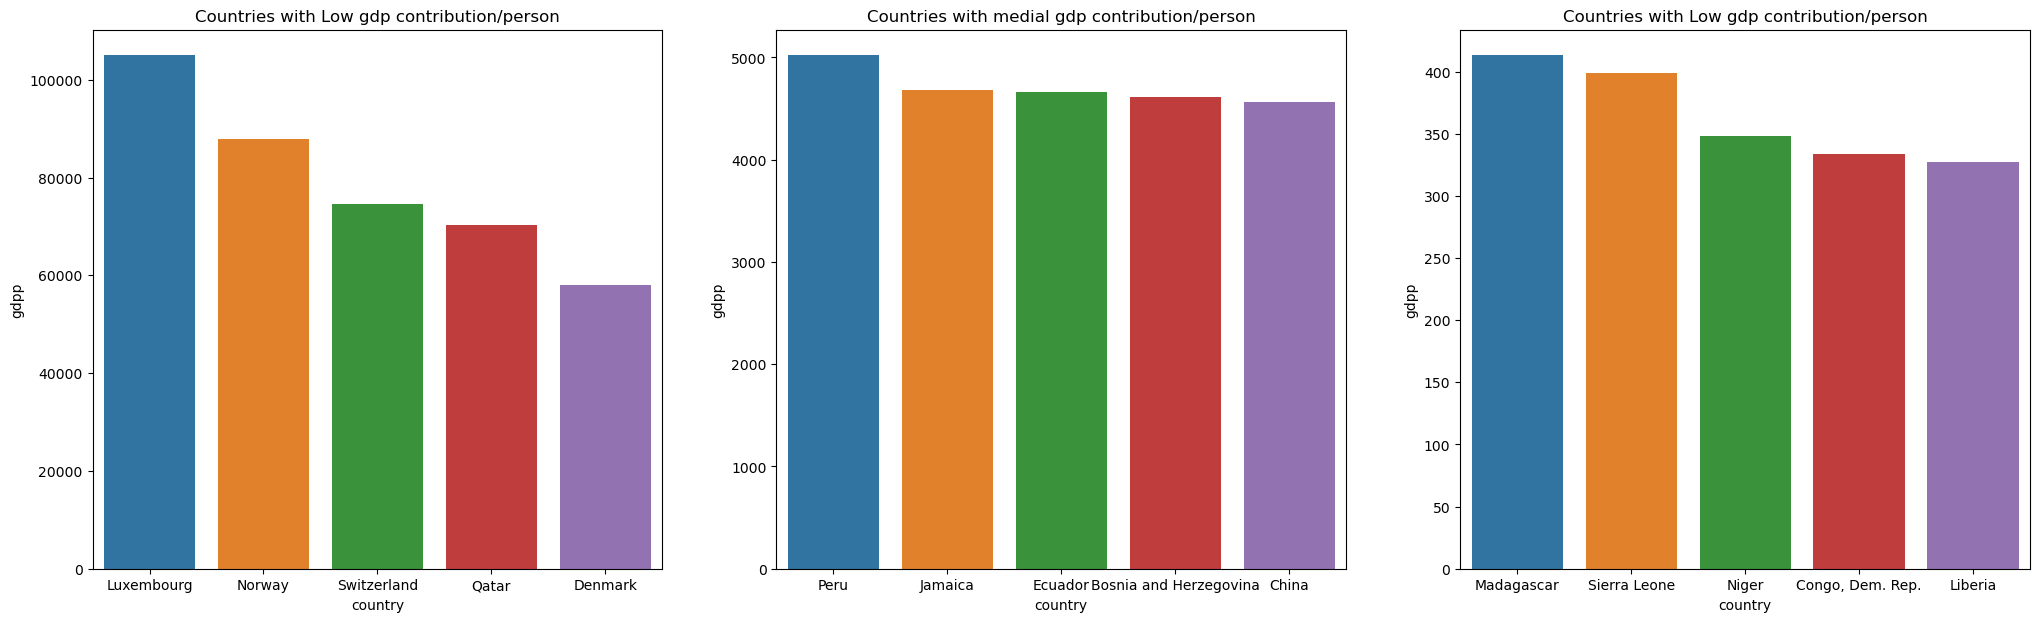

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(x='country', y='gdpp', data=df.sort_values(by='gdpp', ascending=False).iloc[:5])
plt.title("Countries with Low gdp contribution/person")
plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='gdpp', data=df.sort_values(by='gdpp', ascending=False).iloc[81:86])
plt.title('Countries with medial gdp contribution/person')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='gdpp', data=df.sort_values(by='gdpp', ascending=False).iloc[161:166])
plt.title('Countries with Low gdp contribution/person')
plt.show()

<Axes: >

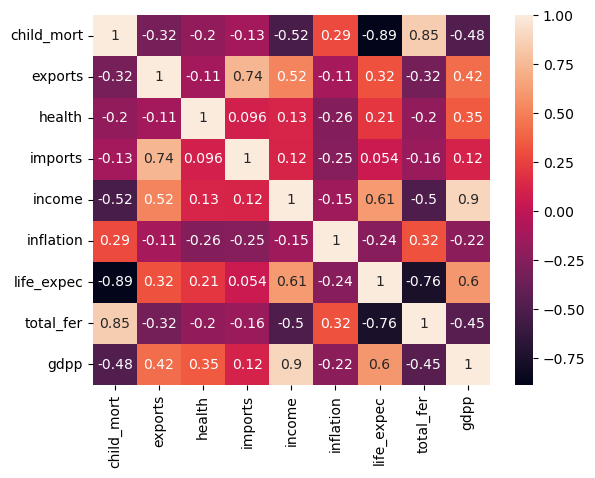

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df1=pd.DataFrame()
df1['Health']=(df['child_mort']/df['child_mort'].mean())+(df['life_expec']+df['life_expec'].mean())+(df['total_fer']/df['total_fer'].mean())
df1['Trade']=(df['imports']/df['imports'].mean())+(df['exports']/df['exports'].mean())
df1['Finance']=(df['income']/df['income'].mean())+(df['inflation']+df['inflation'].mean())+(df['gdpp']/df['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,131.086866,1.200812,17.358395
1,147.849156,1.717580,13.166506
2,148.749378,1.603752,24.978277
3,135.854747,2.430387,30.798251
4,148.347361,2.362940,11.276936


In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms=MinMaxScaler()
ss=StandardScaler()
df1['Health']=mms.fit_transform(df1[['Health']])
df1['Trade']=mms.fit_transform(df1[['Trade']])
df1['Finance']=mms.fit_transform(df1[['Finance']])
df1.insert(loc=0,value=list(df['country']),column='Country')
df1.head(10)

,Country,Health,Trade,Finance
0,Afghanistan,0.489288,0.139614,0.110283
1,Albania,0.864363,0.199901,0.070985
2,Algeria,0.884507,0.186622,0.181720
3,Angola,0.595975,0.283058,0.236282
4,Antigua and Barbuda,0.875511,0.275189,0.053270
5,Argentina,0.857413,0.092969,0.234114
6,Armenia,0.798416,0.171258,0.099339
7,Australia,0.987133,0.107714,0.091548
8,Austria,0.949558,0.264032,0.086226
9,Azerbaijan,0.718519,0.205122,0.162850


In [23]:
df2=df.copy(deep = True)

col=list(df.columns)
col.remove('health');col.remove('country')
df2['health']=ss.fit_transform(df[['health']])
for i in col:
    df2[i]=mms.fit_transform(df2[[i]])
df2.drop(columns='country',inplace=True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [31]:
from sklearn.decomposition import PCA
pca=PCA()
pca_df2=pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

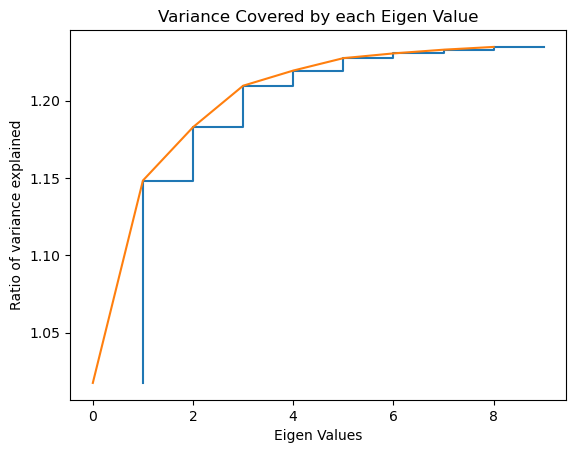

In [35]:
plt.step(list(range(1,10)),np.cumsum(pca.explained_variance_))
plt.plot(np.cumsum(pca.explained_variance_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of variance explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [37]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


In [38]:
m1 = df1.drop(columns = ['Country']).values
m2 = pca_df2.values

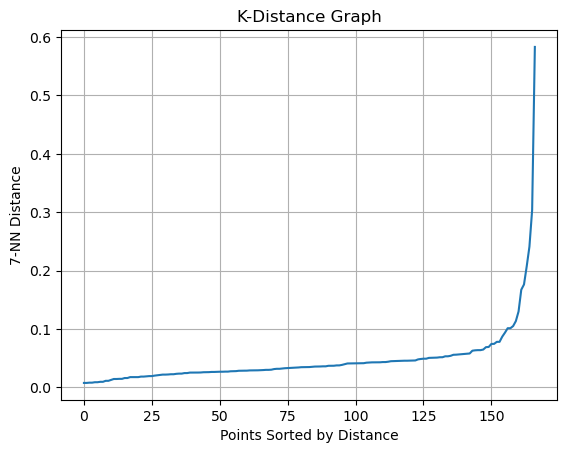

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');